In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import datasets

In [80]:
cust = pd.read_csv('../data/CUST_DATASET_ST.csv')
fsa = pd.read_csv('../data/FSA_DATASET_ST.csv')
mg = pd.read_csv('../data/MG_DATASET_ST.csv')

In [81]:
cust.head()

,cust_id,mg_acc,cust_age,cust_gender,cust_income,cust_cr_score
0,8809246,606711,35,male,48900.0,656
1,8249990,606711,30,female,44800.0,628
2,682248,331376,43,male,104100.0,690
3,6578924,162777,44,male,55700.0,713
4,1712907,614094,62,male,187000.0,752


In [82]:
fsa.head()

,FSA,fam2018,famincome2018median,hholdpop2018,median_age,immigrant2018pct,aboriginalmothertongue2018pct,universitydegree2018pct,belowhighschool2018pct,highschool2018pct,...,rooms_with_a_view2018,country_acres2018,exurban_homesteaders2018,trucks_trades2018,grads_pads2018,our_time2018,wide_open_spaces2018,home_sweet_rows2018,traditional_town_living2018,suburban_scramble2018
0,V0A,6061,66482.08,13556,44.9,0.1028,0.0000,0.2171,0.1608,0.2792,...,0.0,0.0000,0.0873,0.0228,0.0,0.0000,0.0295,0.0,0.0101,0.0000
1,V0B,14527,58081.53,32354,47.8,0.0966,0.0002,0.1967,0.1692,0.2783,...,0.0,0.0000,0.0021,0.1784,0.0,0.0006,0.0110,0.0,0.0823,0.0000
2,V0C,9859,73533.75,25620,36.3,0.0703,0.0084,0.0872,0.2855,0.2856,...,0.0,0.0014,0.4234,0.0030,0.0,0.0000,0.3295,0.0,0.0426,0.0000
3,V0E,27971,51395.29,62439,51.3,0.0878,0.0004,0.1341,0.1908,0.3031,...,0.0,0.0093,0.0023,0.0000,0.0,0.0005,0.0680,0.0,0.0156,0.0003
4,V0G,10476,47981.23,22439,48.8,0.0922,0.0004,0.2184,0.1846,0.2313,...,0.0,0.0010,0.0782,0.0178,0.0,0.0011,0.0002,0.0,0.0368,0.0000


In [83]:
mg.head()

,mg_acc,FSA,origin_date,property_type,purchase_price,amort_period,loan_size,interest_rate,TDS,default,Sample
0,208146,V0A,2018-06-04,detached,456000.0,25 years,364800.0,2.73,0.260444,0.0,Estimation
1,43202,V0A,2016-11-21,detached,354000.0,30 years,283200.0,1.95,0.143560,0.0,Validation
2,875975,V0A,2017-06-13,detached,401000.0,25 years,320800.0,1.27,0.335701,0.0,Validation
3,445492,V0A,2015-06-24,detached,319000.0,25 years,252010.0,1.94,0.085110,0.0,Estimation
4,978049,V0A,2017-04-01,semi-detached/row/town-houses,285000.0,25 years,225150.0,2.66,0.200871,NaN,Holdout


In [59]:
mg.isnull().sum()/len(mg)

mg_acc            0.000000
FSA               0.000000
origin_date       0.000000
property_type     0.000000
purchase_price    0.000000
amort_period      0.000000
loan_size         0.000000
interest_rate     0.000000
TDS               0.000000
default           0.254627
Sample            0.000000
dtype: float64

# Data Cleaning and Feature Engineering

In [84]:
merged = mg.merge(cust, how = 'inner', on = 'mg_acc')
# One mortgage account can have multiple cust_id (eg. couples), so I only keep the cust_id with the highest credit score per mortgage account
merged = merged.sort_values('cust_cr_score', ascending=False).drop_duplicates('mg_acc')
# merged = merged.merge(fsa, how='left', on ='FSA')

Added a new variable: 
* loan_years
* loan-to-value ratio

In [85]:
merged['origin_date'] = pd.to_datetime(merged['origin_date'])
merged['loan_years'] = (pd.Timestamp.today() - merged['origin_date']) / np.timedelta64(1, 'Y')

In [86]:
merged['lvr'] = merged['loan_size']/merged['purchase_price']

In [87]:
merged['amort_period']= merged['amort_period'].apply(lambda x: x.split()[0])
merged = merged.astype({'amort_period':'int'})

In [102]:
#merged[merged['Sample'] != 'Holdout'].to_csv('../data/merged_df.csv',index=False)


In [93]:
merged.head()

,mg_acc,FSA,origin_date,property_type,purchase_price,amort_period,loan_size,interest_rate,TDS,default,Sample,cust_id,cust_age,cust_gender,cust_income,cust_cr_score,loan_years,lvr
755,6052,V0R,2015-02-06,semi-detached/row/town-houses,258000.0,25,206400.0,1.61,0.134889,0.0,Validation,4164705,59,male,51500.0,900,7.672962,0.80
1926,733098,V2K,2012-01-12,detached,299000.0,25,239200.0,2.38,0.135672,1.0,Estimation,2277661,58,male,97500.0,900,10.742156,0.80
2473,837298,V2X,2018-09-23,apartment,350000.0,25,276500.0,1.34,0.243011,0.0,Validation,2024658,44,female,88900.0,900,4.045236,0.79
1521,660468,V1Y,2015-04-30,detached,840000.0,25,621600.0,1.83,0.291169,NaN,Holdout,6924841,52,male,55300.0,900,7.445716,0.74
4382,434257,V6G,2018-09-03,apartment,945000.0,25,756000.0,1.75,0.282390,1.0,Validation,4498904,57,male,88400.0,899,4.099994,0.80


In [94]:
train_df = merged[merged['Sample'] == 'Estimation']
val_df = merged[merged['Sample'] == 'Validation']
test_df = merged[merged['Sample'] == 'Holdout']

In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 1926 to 4530
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mg_acc          2103 non-null   int64         
 1   FSA             2103 non-null   object        
 2   origin_date     2103 non-null   datetime64[ns]
 3   property_type   2103 non-null   object        
 4   purchase_price  2103 non-null   float64       
 5   amort_period    2103 non-null   int64         
 6   loan_size       2103 non-null   float64       
 7   interest_rate   2103 non-null   float64       
 8   TDS             2103 non-null   float64       
 9   default         2103 non-null   float64       
 10  Sample          2103 non-null   object        
 11  cust_id         2103 non-null   int64         
 12  cust_age        2103 non-null   int64         
 13  cust_gender     2103 non-null   object        
 14  cust_income     2103 non-null   float64       
 15  c

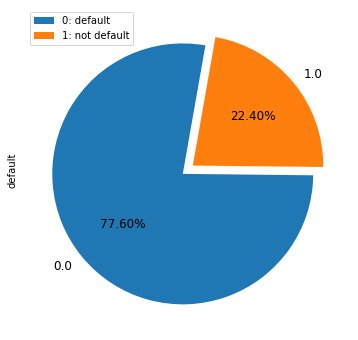

In [96]:
# pie chart
train_df['default'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: default","1: not default"]);

There is class imbalance. Only around 22% of the examples in the training set belong to the "Default" class, which is of our interest. We are likely to be interested in finding default applicants so that the company can avoid applicants with high default risk in promotion and so predicting "Default" examples correctly is more important to us.

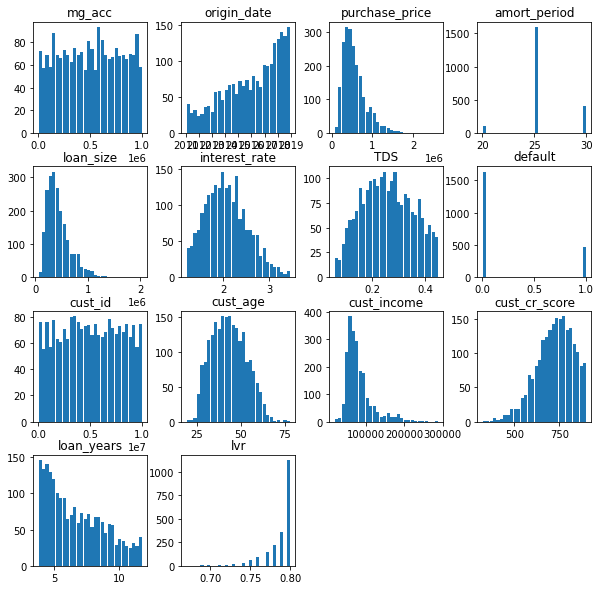

In [97]:
train_df.hist(
    bins=30,
    figsize=(10, 10),
    grid = False,
    rwidth = 0.9,
)
plt.show()

In [98]:
train_df.to_csv('../data/train_df.csv',index=False)
val_df.to_csv('../data/val_df.csv',index=False)
test_df.to_csv('../data/test_df.csv',index=False)